In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data_path = ('C:\\Users\\STEVEN\\Documents\\Thinkful\\sent_sentences\\yelp_labelled.txt'
            )
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['message', 'positive']
yelp_raw.head()

,message,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [66]:
keywords = ['great', 'kind', 'fun', 'fast', 'delicious']

for key in keywords:

    yelp_raw[str(key)] = yelp_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

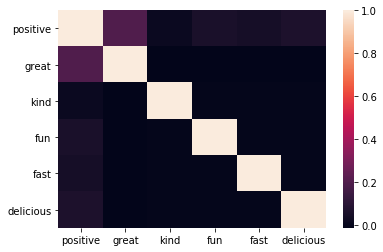

In [67]:
sns.heatmap(yelp_raw.corr())

In [68]:
data = yelp_raw[keywords]
target = yelp_raw['positive']

In [69]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 452


In [70]:
df_confusion = pd.crosstab(target, y_pred)
print(df_confusion)


col_0       0   1
positive         
0         499   1
1         451  49


In [71]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.58, 0.54, 0.55, 0.51, 0.54, 0.51, 0.57, 0.56, 0.54, 0.57])

In [72]:
#iteration #2

keywords = ['great', 'kind', 'fun', 'fast', 'delicious', 'tasty']

for key in keywords:

    yelp_raw[str(key)] = yelp_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [73]:
yelp_raw['not'] = yelp_raw.message.str.contains(' ' + 'not' + ' ', 
                                               case=False)
yelp_raw['not'] = np.invert(yelp_raw['not'])

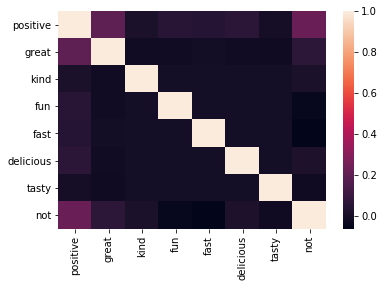

In [74]:
sns.heatmap(yelp_raw.corr())

In [75]:
data2 = yelp_raw[keywords + ['not']]
target = yelp_raw['positive']

In [76]:
bnb.fit(data2, target)

y_pred = bnb.predict(data2)

print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target != y_pred).sum()
))

df_confusion = pd.crosstab(target, y_pred)
print(df_confusion)


Number of mislabeled points out of a total 1000 points : 431
col_0      0    1
positive         
0         85  415
1         16  484


In [77]:
#3 Lets add in one for question marks

In [78]:
yelp_raw['?'] = yelp_raw.message.str.contains(' '+'?'+ ' ', 
                                               case=False)

yelp_raw['?'] = np.invert(yelp_raw['?'])

In [79]:
data3 = yelp_raw[keywords + ['?']]

In [80]:
bnb.fit(data3, target)
y_pred = bnb.predict(data3)

print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 451


In [81]:
df_confusion2 = pd.crosstab(target, y_pred)
print(df_confusion2)


col_0       0   1
positive         
0         499   1
1         450  50


In [82]:
#4 All combined

data4 = yelp_raw[keywords + ['?'] + ['not']]

In [83]:
bnb.fit(data4, target)
y_pred = bnb.predict(data4)

print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 431


In [84]:
#5 only the not and ?

data5 = yelp_raw[['not'] + ['?']]

In [85]:
bnb.fit(data5, target)
y_pred = bnb.predict(data5)

print("Number of mislabeled points out of a total {} points : {}".format(
    data5.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 431


Q1.  None of my classifiers seem good enought to overfit.  I created the not to create a very simplistic sarcasm filter, but I believe that I may have underestimated the importance of the owrd and the way it was used in the reviews. 

Q2.  There was a three way tie between all the engines that used the simplistic negative model.  This is probably due to the fact that people will often use negatives of good descriptions to describe food and it's taste ie. not good, not tasty.  This illustrates minor dislike.  

Q3.  The most important feature was the model that identified where people used not as a negative review.  This review even on it's own performed better than one just simply identifying positive words.  

In [86]:
#Comparison of my features to new data set.
data_path = ('C:\\Users\\STEVEN\\Documents\\Thinkful\\sent_sentences\\imdb_labelled.txt'
            )
imdb_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
imdb_raw.columns = ['message', 'positive']
imdb_raw.head()


,message,positive
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [87]:
keywords = ['great', 'kind', 'fun', 'fast', 'delicious']

for key in keywords:

    imdb_raw[str(key)] = imdb_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False)
    

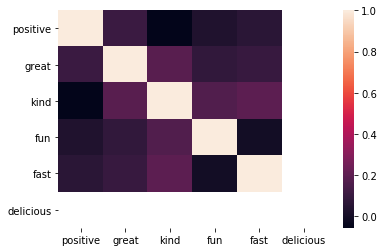

In [20]:
sns.heatmap(imdb_raw.corr())

In [21]:
data = imdb_raw[keywords]
target = imdb_raw['positive']

In [22]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))



Number of mislabeled points out of a total 748 points : 359


In [23]:
#not to shabby
#print(y_pred)

In [24]:
print(imdb_raw.head())
imdb_raw['y_pred'] = y_pred

                                             message  positive  great   kind  \
0  A very, very, very slow-moving, aimless movie ...         0  False  False   
1  Not sure who was more lost - the flat characte...         0  False  False   
2  Attempting artiness with black & white and cle...         0  False  False   
3       Very little music or anything to speak of.           0  False  False   
4  The best scene in the movie was when Gerardo i...         1  False  False   

     fun   fast  delicious  
0  False  False      False  
1  False  False      False  
2  False  False      False  
3  False  False      False  
4  False  False      False  


In [26]:
df_confusion = pd.crosstab(target, y_pred)
print(df_confusion)



col_0     0    1
positive        
0         4  358
1         1  385


In [27]:
print(imdb_raw.loc[imdb_raw['positive'] == 0].loc[imdb_raw['y_pred'] == 0].message)
#print(imdb_raw.head())



40     Frankly, after Cotton club and Unfaithful, it ...
230    The use of slow-motion needlessly repeats itse...
318    I could not understand, what kind of idiot wou...
466    Even allowing for poor production values for t...
Name: message, dtype: object
